In [1]:
using Revise
include("../src/AdsorptionModel.jl")

run_simulation (generic function with 1 method)

In [2]:
using XLSX
using DataFrames

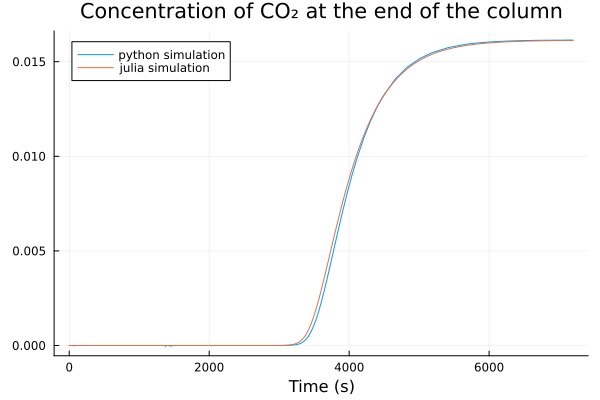

In [ ]:
df = XLSX.readtable("../excels/x_sol_ads_cycle0.xlsx", 1) |> DataFrame
plot(parse.(Float64, names(df)), collect(df[10, :]), label="python simulation")
ts = 1:7200
plot!(ts, [sol(t)[index_data.iCO2, end] for t in ts], label="julia simulation")
xlabel!("Time (s)")
title!("Concentration of CO₂ at the end of the column")
savefig("CO2_concentration.png")

In [3]:
using DifferentialEquations
@show 0.55 * Psat_H2O(288.15 - 273) / 1.01325e5
adsorption = OperatingParameters(;
                    step_name = "Adsorption",
                    u_feed = 0.1,
                    T_feed = 288.15,
                    T_amb = 288.15,
                    y_CO2_feed = 0.0004,
                    y_H2O_feed = 0.01,
                    P_out = 1e5,
                    duration = 3600*2)

heating = OperatingParameters(;
                    step_name = "Heating",
                    u_feed = 0.0,
                    T_feed = 378.17,
                    T_amb = 99.35+273.15,
                    P_out = 1e5,
                    y_CO2_feed = 0.0,
                    y_H2O_feed = 1.0,
                    duration = 3600*2)

desorption = OperatingParameters(;
                step_name = "Desorption",
                u_feed = 0.1,
                T_feed = 378.17,
                T_amb = 99.35+273.15,
                P_out = 1e5,
                y_CO2_feed = 0.0,
                y_H2O_feed = 0.0,
                duration = 3600*2)

cooling = OperatingParameters(;
                    step_name = "Cooling",
                    u_feed = 0.0,
                    T_feed = 378.17,
                    T_amb = 288.15,
                    P_out = 1e5,
                    y_CO2_feed = 0.0,
                    y_H2O_feed = 1.0,
                    duration = 3600*2)

cycle_steps = [adsorption, heating, desorption, cooling]
@time sol, index_data = run_simulation(;N=10, cycle_steps, num_cycles=1)

(0.55 * Psat_H2O(288.15 - 273)) / 101325.0 = 0.009345593559109749
  0.350350 seconds (9.90 M allocations: 727.547 MiB, 24.17% gc time)


(Main.sol, AdsorptionData(1, 2, 3, 4, 5, 6, 7, 8, 1, 2, OperatingParameters(0.0, 378.17, 288.15, 100000.0, 0.0, 1.0, 7200.0, "Cooling", 0.0, 31.805549723654618, 0.0, 0.0, 31.805549723654618, 3.01e-6, 2324.9856847991523, 0.006998206911245449)))

In [7]:
using DifferentialEquations
@show 0.55 * Psat_H2O(288.15 - 273) / 1.01325e5
adsorption = OperatingParameters(;
                    step_name = "Adsorption",
                    u_feed = 0.1,
                    T_feed = 288.15,
                    T_amb = 288.15,
                    P_out = 1.01325e5,
                    y_CO2_feed = 0.0004,
                    y_H2O_feed = 0.01,
                    duration = 800000)

heating = OperatingParameters(;
                    step_name = "Heating",
                    u_feed = 0.0,
                    T_feed = 378.17,
                    T_amb = 99.35+273.15,
                    P_out = 0.12e5,
                    y_CO2_feed = 0.0,
                    y_H2O_feed = 1.0,
                    duration = 1147)

desorption = OperatingParameters(;
                step_name = "Desorption",
                u_feed = 0.0,
                T_feed = 120+273,
                T_amb = 373.15,
                P_out = 0.e5,
                y_CO2_feed = 0.0,
                y_H2O_feed = 1.0,
                duration = 21377)

cooling = OperatingParameters(;
                    step_name = "Cooling",
                    u_feed = 0.0,
                    T_feed = 378.17,
                    T_amb = 288.15,
                    P_out = 0.12e5,
                    y_CO2_feed = 0.0,
                    y_H2O_feed = 1.0,
                    duration = 400)

cycle_steps = [adsorption, heating, desorption, cooling]
@time sol, index_data = run_simulation(;N=10, cycle_steps, num_cycles=1)

(0.55 * Psat_H2O(288.15 - 273)) / 101325.0 = 0.009345593559109749


DomainError: DomainError with -1.734776767191842e-13:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

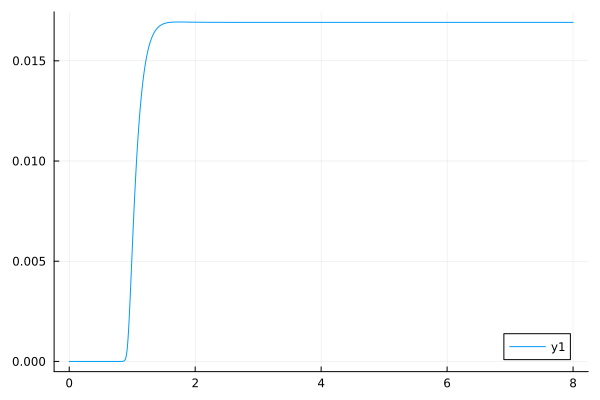

In [6]:
ts = 1:3600*8*1
p = plot(ts./3600, [sol(t)[index_data.iCO2, end] for t in ts])
# Plot the time steps


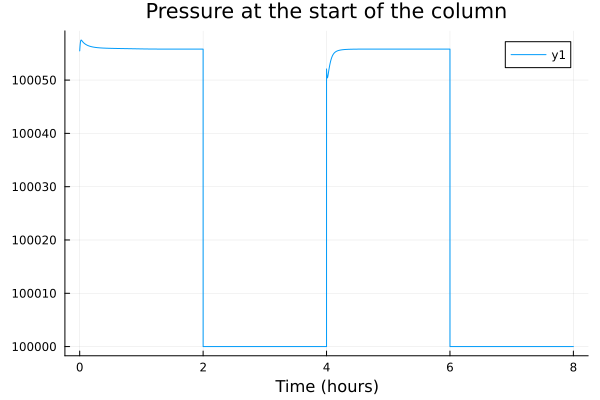

In [32]:
ts = 1:3600*8
plot(ts./3600, [sol(t)[index_data.ip, 1] for t in ts])
title!("Pressure at the start of the column")
xlabel!("Time (hours)")

In [3]:
df = XLSX.readtable("../excels/Lewatit_dry_BTC.xlsx", 1) |> DataFrame

Row,Time h),CO2,N2,CO2_ppm
,Any,Any,Any,Any
1,0.000166667,0,0,0
2,0.01145,0,0,0
3,0.01626,0,0.07097,0
4,0.02316,0,0.33616,0
5,0.0289,0,0.57275,0
6,0.03479,0,0.72758,0
7,0.04039,0,0.82117,0
8,0.04599,0,0.87495,0
9,0.05257,0,0.90555,0


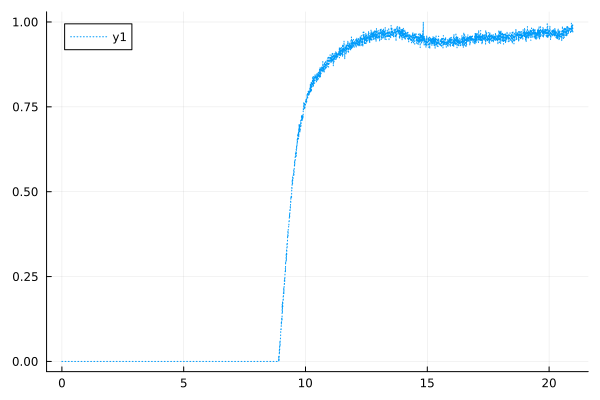

In [7]:
plot(df[:, "Time h)"], df[:, "CO2"], ls=:dot)